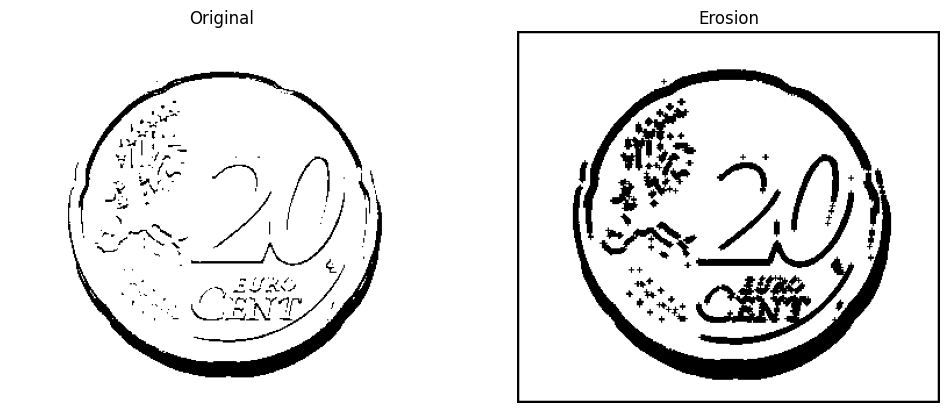

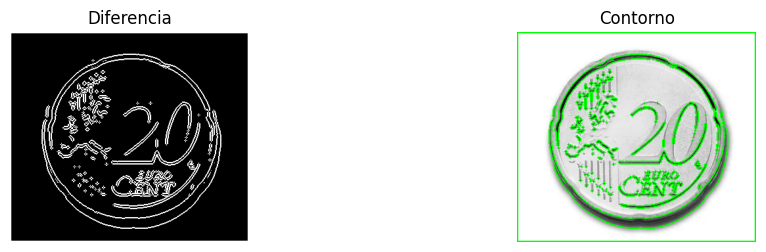

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carga la imagen
ruta_imagen = "C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/moneda.png"
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Binariza la imagen
_, imagenBinarizada = cv2.threshold(imagen, 120, 255, cv2.THRESH_BINARY)

def erosion_manual(imagen, kernel):
    altura, ancho = imagen.shape
    kh, kw = kernel.shape

    # Calcula el padding necesario para que el kernel se ajuste completamente a la imagen
    ph = kh // 2
    pw = kw // 2

    # Crea una imagen resultado con el mismo tamaño que la original
    resultado = np.zeros_like(imagen)

    # Aplica la erosión
    for i in range(ph, altura - ph):
        for j in range(pw, ancho - pw):
            # Extrae la región vecina definida por el tamaño del kernel
            vecindario = imagen[i-ph:i+ph+1, j-pw:j+pw+1]
            erosion = np.min(vecindario[kernel != 0])  # Usar kernel != 0 para identificar píxeles activos
            resultado[i, j] = erosion

    return resultado

kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))  # Reducir el tamaño del kernel para que sea manejable

# Aplica la función de erosión manual con el kernel de la cruz
erosion2 = erosion_manual(imagenBinarizada, kernel1)

diferencia = imagenBinarizada - erosion2

img_contorno = imagen.copy()
img_contorno[diferencia != 0] = 255
img_con_diferencia = cv2.cvtColor(img_contorno, cv2.COLOR_GRAY2RGB)
img_con_diferencia[diferencia != 0] = [0, 255, 0]

# --- Resultados --- #
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(imagenBinarizada, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(erosion2, cmap='gray')
plt.title("Erosion")
plt.axis('off')

plt.show()

plt.figure(figsize=(12,6))
plt.subplot(2, 2, 1)
plt.imshow(diferencia, cmap='gray')
plt.title("Diferencia")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_con_diferencia)
plt.title("Contorno")
plt.axis('off')

plt.show()